## Функции Активации

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import torch

In [ ]:
import numpy as np

## MLP

## Данные

In [ ]:
import torchvision as tv

In [ ]:
import time

In [ ]:
BATCH_SIZE=256

In [ ]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



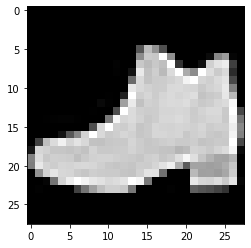

In [ ]:
plt.imshow(train_dataset[15][0].numpy().reshape(28,28), cmap='gray')

In [ ]:
train_dataset[15][0].shape

torch.Size([1, 28, 28])

## Модель

In [ ]:
def train_model():
  for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0 # начальные величины для счетчиков
    train_loss, train_acc = 0., 0. # начальные величины для счетчиков
    start=time.time() # начальные величины для счетчиков

    model.train() # данная штука не имеет смысла,т.к. нет Dropout и Батч-нормализации, но привыкаем
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X) # количество картинок прошедших через нашу модель

    test_iters, test_passed  = 0, 0 # начальные величины для счетчиков
    test_loss, test_acc = 0., 0. # начальные величины для счетчиков
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)

    print("ep: {}, taked: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, round(time.time() - start,2), train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

In [ ]:
num_epochs = 20

In [ ]:
model = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(784, 1280),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(1280, 784),
        torch.nn.ReLU(),
        torch.nn.Linear(784, 512),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(512),
        torch.nn.Linear(512, 256),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(256),
        torch.nn.Linear(256, 128),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(128),
        torch.nn.Linear(128, 10)
)

In [ ]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1280, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=1280, out_features=784, bias=True)
  (5): ReLU()
  (6): Linear(in_features=784, out_features=512, bias=True)
  (7): ReLU()
  (8): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=512, out_features=256, bias=True)
  (10): ReLU()
  (11): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Linear(in_features=256, out_features=128, bias=True)
  (13): ReLU()
  (14): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.01)
train_model()

ep: 0, taked: 22.09, train_loss: 0.6723849641515853, train_acc: 0.7438166666666667, test_loss: 0.5451928049325943, test_acc: 0.7857
ep: 1, taked: 20.89, train_loss: 0.4847395565915615, train_acc: 0.8212666666666667, test_loss: 0.4420753940939903, test_acc: 0.8386
ep: 2, taked: 22.42, train_loss: 0.43536686859232315, train_acc: 0.8383666666666667, test_loss: 0.43306212201714517, test_acc: 0.8372
ep: 3, taked: 28.13, train_loss: 0.4149325822262054, train_acc: 0.8466666666666667, test_loss: 0.40695901997387407, test_acc: 0.8483
ep: 4, taked: 26.18, train_loss: 0.3974112863870377, train_acc: 0.85245, test_loss: 0.4122442875057459, test_acc: 0.8486
ep: 5, taked: 26.72, train_loss: 0.3843783714669816, train_acc: 0.8578666666666667, test_loss: 0.38754216991364954, test_acc: 0.8558
ep: 6, taked: 26.05, train_loss: 0.36986822752242393, train_acc: 0.8639333333333333, test_loss: 0.36519539952278135, test_acc: 0.8632
ep: 7, taked: 26.01, train_loss: 0.3624051588646909, train_acc: 0.865616666666666